<a href="https://colab.research.google.com/github/Shravan1711/Data-Science-Assignments/blob/main/Statistics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load "numpy" and "pandas" for manipulating numbers and data frames
Load "matplotlib.pyplot" and "seaborn" for data visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the "Dataset" file as a Pandas Data Frame


In [2]:
data=pd.read_csv('/content/Mobile_Phones.csv')
data.head()

,PID,Blue,Wi_Fi,Tch_Scr,Ext_Mem,Px_h,Px_w,Scr_h,Scr_w,PC,FC,Int_Mem,Bty_Pwr,RAM,Depth,Weight,Price
0,AAB346A,yes,yes,no,no,780,460,3,1,2,2,8,2800,2,7,320,3297
1,AAC347I,yes,yes,no,no,780,560,2,1,4,2,8,3000,2,7,280,4500
2,BAB657J,no,yes,no,no,840,720,2,1,4,2,8,3300,2,7,400,4898
3,BBD456K,no,yes,yes,no,1280,1120,5,3,6,2,32,3000,2,3,300,6900
4,CCP761U,no,yes,yes,no,1280,1080,4,3,6,2,16,3000,2,3,210,5600


Get the dimensions of the dataframe


In [3]:
data.shape

(50, 17)

 Get the column names of the dataframe


In [4]:
data.columns

Index(['PID', 'Blue', 'Wi_Fi', 'Tch_Scr', 'Ext_Mem', 'Px_h', 'Px_w', 'Scr_h',
       'Scr_w', 'PC', 'FC', 'Int_Mem', 'Bty_Pwr', 'RAM', 'Depth', 'Weight',
       'Price'],
      dtype='object')

Look at basic information about the dataframe


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PID      50 non-null     object
 1   Blue     50 non-null     object
 2   Wi_Fi    50 non-null     object
 3   Tch_Scr  50 non-null     object
 4   Ext_Mem  50 non-null     object
 5   Px_h     50 non-null     int64 
 6   Px_w     50 non-null     int64 
 7   Scr_h    50 non-null     int64 
 8   Scr_w    50 non-null     int64 
 9   PC       50 non-null     int64 
 10  FC       50 non-null     int64 
 11  Int_Mem  50 non-null     int64 
 12  Bty_Pwr  50 non-null     int64 
 13  RAM      50 non-null     int64 
 14  Depth    50 non-null     int64 
 15  Weight   50 non-null     int64 
 16  Price    50 non-null     int64 
dtypes: int64(12), object(5)
memory usage: 6.8+ KB


Observations:

There are 50 phones in the data set.

There are 17 features in the data set including the "PID" feature which is used as the row index labels.

There are no missing values in the data set.

In [6]:
# The children want phones that have the following: Bluetooth, WiFi, touch screen and external memory support
# Create a logical condition for this situation and store the logical values as "con1"
df=pd.DataFrame(data,columns=['Blue','Wi_Fi','Tch_Scr','Ext_Mem'])
df.head()

,Blue,Wi_Fi,Tch_Scr,Ext_Mem
0,yes,yes,no,no
1,yes,yes,no,no
2,no,yes,no,no
3,no,yes,yes,no
4,no,yes,yes,no


In [7]:
con1 = (df['Blue']=='yes') & (df['Wi_Fi']=='yes') & (df['Tch_Scr']=='yes') & (df['Ext_Mem']=='yes')
con1.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

## Task 3 - Obtain the logical conditions for the features "Px_h" and "Px_w"

In [8]:
# Get the feature names of the dataframe
df1=pd.DataFrame(data,columns=['Px_h','Px_w'])
df1.head()

,Px_h,Px_w
0,780,460
1,780,560
2,840,720
3,1280,1120
4,1280,1080


In [9]:
# Create a new feature called "Px" which stores the total resolution of the screen


In [10]:
df1['Px']=df1['Px_h']*df1['Px_w']
df1.head()

,Px_h,Px_w,Px
0,780,460,358800
1,780,560,436800
2,840,720,604800
3,1280,1120,1433600
4,1280,1080,1382400


In [11]:
df1['Px'].mean()

4517184.0

In [12]:
df1['Px'].median()

5108400.0

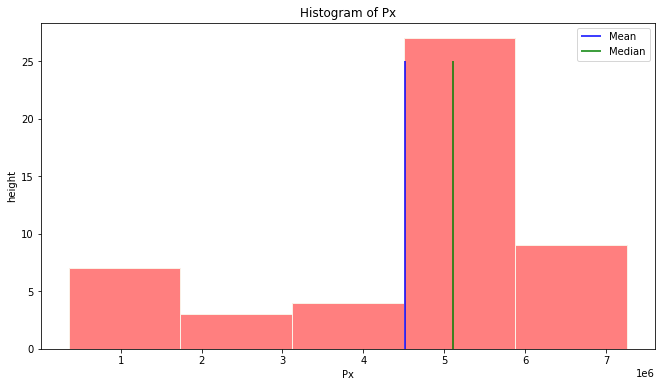

In [13]:
# Create a histogram of the "Px" feature and also show the mean and the median

plt.figure(figsize=(11,6))
sns.histplot(data=df1,x='Px',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Px")
plt.xlabel('Px')
plt.ylabel('height')
plt.vlines(df1['Px'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df1['Px'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [14]:
# The children want phones that have good screen resolutions
# Consider the phones that have screen resolutions greater than or equal to the median value in the data set
# Create a logical condition for this situation and store the logical values as "con2"

con2=df1['Px']>=df1['Px'].median()
con2.head()

0    False
1    False
2    False
3    False
4    False
Name: Px, dtype: bool

Observations:

The features "Px_h" and "Px_w" are respectively the number of pixels in the phone screen in the vertical and horizontal axes.

We created a new feature called "Px" which is the product of the features "Px_h" and "Px_w".

The median has been selected as a threshold in this case.

In case it is too strict, we can choose the mean as a threshold.

# Task 4 - Obtain the logical conditions for the features "Scr_h" and "Scr_w"

In [15]:
# Let's tackle these features: "Scr_h", "Scr_w"
# Create a new feature called "Scr_d" which stores the length of the diagonal of the screen of the phone

df2 = pd.DataFrame(data,columns=['Scr_h','Scr_w'])
df2.head()

,Scr_h,Scr_w
0,3,1
1,2,1
2,2,1
3,5,3
4,4,3


In [17]:
# Create a new feature called "Scr_d" which stores the length of the diagonal of the screen of the phone

df2['Scr_d'] = np.sqrt((df2['Scr_h']**2) + (df2['Scr_w']**2))
df2.head()

,Scr_h,Scr_w,Scr_d
0,3,1,3.162278
1,2,1,2.236068
2,2,1,2.236068
3,5,3,5.830952
4,4,3,5.000000


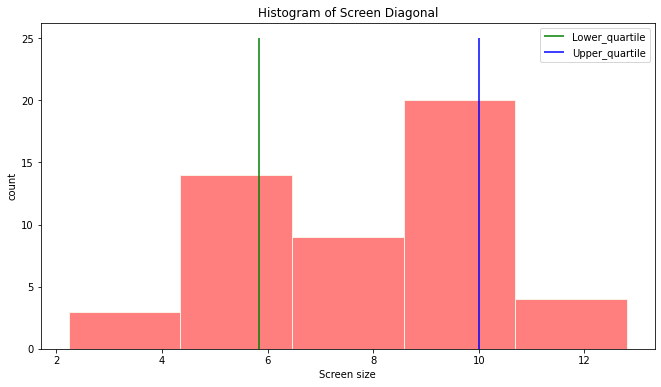

In [18]:
# Create a histogram of the "Scr_d" feature and also show the quartiles

Q3,Q1 = np.percentile(df2['Scr_d'],[75,25])
IQR = round(Q3-Q1,2)

plt.figure(figsize=(11,6))
sns.histplot(data=df2,x='Scr_d',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Screen Diagonal")
plt.xlabel('Screen size')
plt.ylabel('count')
plt.vlines(Q1,ymin=0,ymax=25,color='green',label='Lower_quartile')
plt.vlines(Q3,ymin=0,ymax=25,color='blue',label='Upper_quartile')
plt.legend()
plt.show()

In [19]:
# The children want phones that have very good screen sizes
# Consider the phones that have screen sizes greater than or equal to the upper quartile value in the data set
# Create a logical condition for this situation and store the logical values as "con3"

con3 = df2['Scr_d']>=Q3
con3.head()

0    False
1    False
2    False
3    False
4    False
Name: Scr_d, dtype: bool

Observations:

The features "Scr_h" and "Scr_w" are respectively the height and the width of the phone screen.

We created a new feature called "Scr_d" which is essentially the length of the screen diagonal.

The upper quartile has been selected as a threshold in this case as the children were very particular on this point.

In case it is too strict, we can choose the mean or the median as a threshold.

# Task 5 - Obtain the logical conditions for the features "PC" and "FC"

In [20]:
# Let's tackle these features: "PC", "FC"
# Create a histogram of the "PC" feature and also show the mean and the median

df3 = pd.DataFrame(data,columns=['PC'])
df3.head()

,PC
0,2
1,4
2,4
3,6
4,6


In [21]:
df3['PC'].mean()

42.16

In [22]:
df3['PC'].median()

40.0

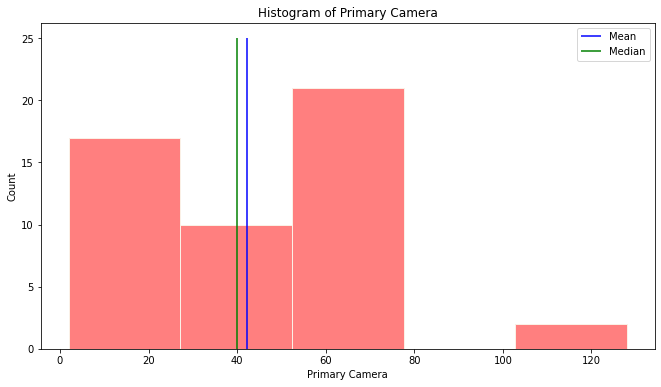

In [23]:
plt.figure(figsize=(11,6))
sns.histplot(data=df3,x='PC',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Primary Camera")
plt.xlabel('Primary Camera')
plt.vlines(df3['PC'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df3['PC'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [24]:
# Create a histogram of the "FC" feature and also show the mean and the median

df4 = pd.DataFrame(data,columns=['FC'])
df4.head()

,FC
0,2
1,2
2,2
3,2
4,2


In [25]:
df4['FC'].mean()

20.76

In [26]:
df4['FC'].median()

16.0

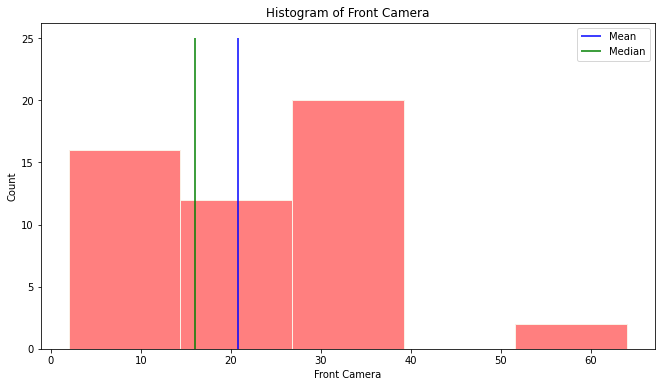

In [27]:
plt.figure(figsize=(11,6))
sns.histplot(data=df4,x='FC',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Front Camera")
plt.xlabel('Front Camera')
plt.vlines(df4['FC'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df4['FC'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [28]:
# The children want phones that have good primary and front camera resolutions
# Consider the phones that have primary and front camera resolutions greater than or equal to their respective mean values
# Create a logical condition for this situation and store the logical values as "con4"
con4 = (df3>=df3.mean()) & (df4>=df4.mean())
con4.head()

,FC,PC
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [29]:
# Let's tackle these features: "Int_Mem", "Bty_Pwr", "RAM"
# Create a histogram of the "Int_Mem" feature and also show the mean and the median

df5 = pd.DataFrame(data,columns=['Int_Mem'])
df5.head()

,Int_Mem
0,8
1,8
2,8
3,32
4,16


In [30]:
df5['Int_Mem'].mean()

173.76

In [31]:
df5['Int_Mem'].median()

64.0

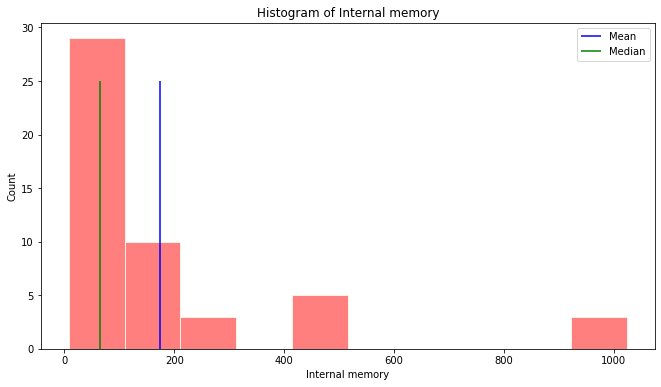

In [32]:
plt.figure(figsize=(11,6))
sns.histplot(data=df5,x='Int_Mem',color='red',edgecolor='linen',alpha=0.5,bins=10)
plt.title("Histogram of Internal memory")
plt.xlabel('Internal memory')
plt.vlines(df5['Int_Mem'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df5['Int_Mem'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [33]:
df6 = pd.DataFrame(data,columns=['Bty_Pwr'])
df6.head()

,Bty_Pwr
0,2800
1,3000
2,3300
3,3000
4,3000


In [34]:
df6['Bty_Pwr'].mean()

3740.0

In [35]:
df6['Bty_Pwr'].median()

3300.0

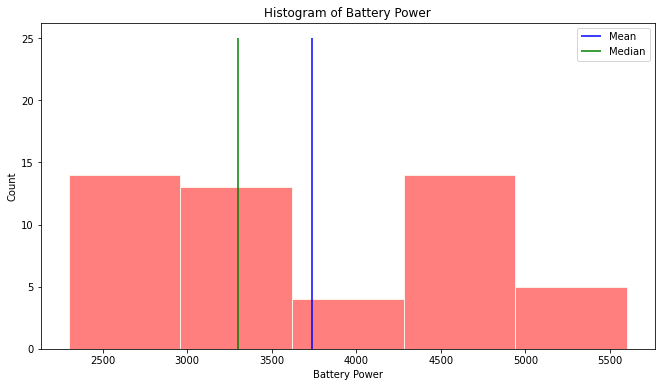

In [89]:
plt.figure(figsize=(11,6))
sns.histplot(data=df6,x='Bty_Pwr',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Battery Power")
plt.xlabel('Battery Power')
plt.vlines(df6['Bty_Pwr'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df6['Bty_Pwr'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [36]:
# Create a histogram of the "RAM" feature and also show the mean and the median

df7 = pd.DataFrame(data,columns=['RAM'])
df7.head()

,RAM
0,2
1,2
2,2
3,2
4,2


In [37]:
df7['RAM'].mean()

5.76

In [38]:
df7['RAM'].median()

5.0

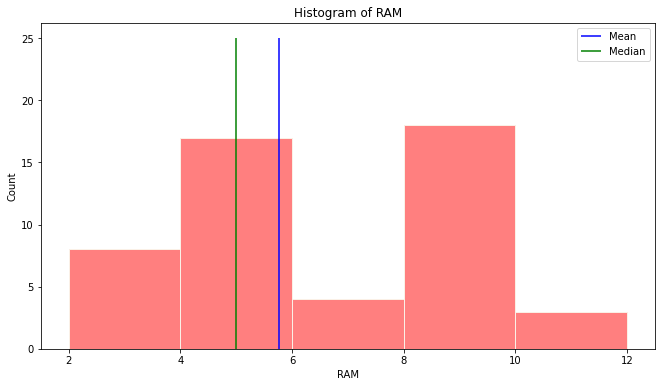

In [39]:
plt.figure(figsize=(11,6))
sns.histplot(data=df7,x='RAM',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of RAM")
plt.xlabel('RAM')
plt.vlines(df7['RAM'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df7['RAM'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [51]:
con5 = (df5>=df5.mean()) & (df6>=df6.mean()) & (df7>=df7.mean())
con5.head()

,Bty_Pwr,Int_Mem,RAM
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


Observations

The features "Int_Mem", "Bty_Pwr" and "RAM" are respectively the internal memory, battery power and RAM of the phones.

The respective means have been selected as thresholds in this case.

.In case it is too strict, we can choose the respective medians as thresholds

# Task 7 - Obtain the logical conditions for the features "Depth" and "Weight"

In [41]:
# Create a histogram of the "Depth" feature and also show the mean and the median

df8 = pd.DataFrame(data,columns=['Depth'])
df8.head()

,Depth
0,7
1,7
2,7
3,3
4,3


In [42]:
df8['Depth'].mean()

3.44

In [43]:
df8['Depth'].median()

3.0

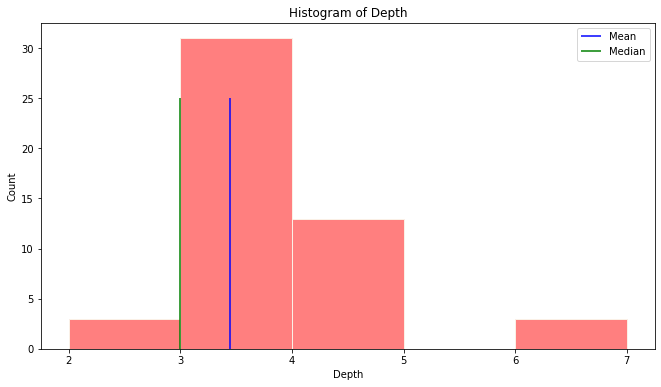

In [44]:
plt.figure(figsize=(11,6))
sns.histplot(data=df8,x='Depth',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Depth")
plt.xlabel('Depth')
plt.vlines(df8['Depth'].mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df8['Depth'].median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [45]:
# Create a histogram of the "Weight" feature and also show the mean and the median

df9 = pd.DataFrame(data,columns=['Weight'])
df9.head()

,Weight
0,320
1,280
2,400
3,300
4,210


In [46]:
df9.mean()

Weight    195.2
dtype: float64

In [47]:
df9.median()

Weight    190.0
dtype: float64

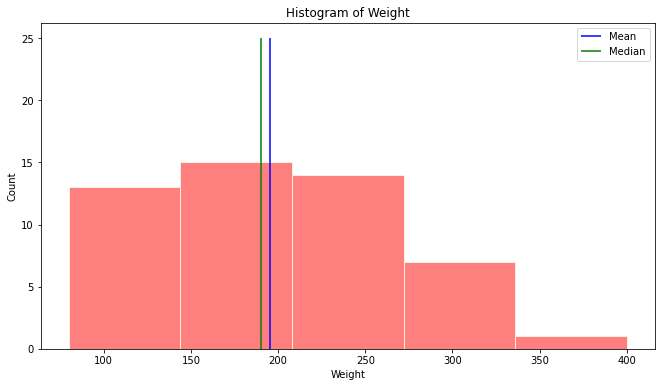

In [48]:
plt.figure(figsize=(11,6))
sns.histplot(data=df9,x='Weight',color='red',edgecolor='linen',alpha=0.5,bins=5)
plt.title("Histogram of Weight")
plt.xlabel('Weight')
plt.vlines(df9.mean(),ymin=0,ymax=25,color='blue',label='Mean')
plt.vlines(df9.median(),ymin=0,ymax=25,color='green',label='Median')
plt.legend()
plt.show()

In [49]:
con6 = (df8<=df8.median()) & (df9<=df9.median())
con6.head()

,Depth,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


Observations:

The features "Depth" and "Weight" are respectively the depth of the phone and the weight of the phone.

The respective medians have been selected as thresholds in this case.

In case it is too strict, we can choose the respective means as thresholds.


# Task 8 - Subset the data based on all the logical conditions

In [59]:
subset = pd.DataFrame(data,columns=[con2 | con3 | con4 | con5])
data1 = subset
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,Bty_Pwr,FC,Int_Mem,PC,RAM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
